<h2 style="color:green"> IMPORT LIBRARIES </h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error

<h2 style="color:green"> IMPORT DATASET </h2>

In [2]:
bigTr=pd.read_csv("C:/Users/HP/Downloads/HackTrain.csv")
bigTe=pd.read_csv("C:/Users/HP/Downloads/HackTest.csv")

<h2 style="color:green"> CHECK TRAINCOLUMNS </h2>

In [3]:
bigTr.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'Global_Sales'],
      dtype='object')

<h2 style="color:green"> CHECK TAIL </h2>

In [4]:
bigTr.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
14571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14572,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14573,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14574,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14575,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01


<h2 style="color:green"> CHECK TESTCOLUMNS </h2>

In [5]:
bigTe.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating'],
      dtype='object')

<h2 style="color:green"> SEPARATE Y(dependent variable) </h2>

In [6]:
y=bigTr.Global_Sales
train=bigTr.drop("Global_Sales",axis=1)

<h2 style="color:green"> APPEND TRAIN AND TEST DATASET </h2>

In [7]:
Data=train.append(bigTe,ignore_index=True,sort=False)

In [8]:
Data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   Critic_Count     8137 non-null   float64
 10  User_Score       10015 non-null  object 
 11  User_Count       7590 non-null   float64
 12  Developer        10096 non-null  object 
 13  Rating           9950 non-null   object 
dtypes: float64(7), object(7)
memory usage: 1.8+ MB


<h2 style="color:green"> CHECK SHAPE </h2>

In [10]:
Data.shape

(16719, 14)

<h2 style="color:green"> EXPLORATORY DATA ANALYSIS </h2>

In [11]:
Data.Platform.describe()

count     16719
unique       31
top         PS2
freq       2161
Name: Platform, dtype: object

In [12]:
Data.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
Data.Platform.isnull().sum()

0

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Platform', ylabel='count'>

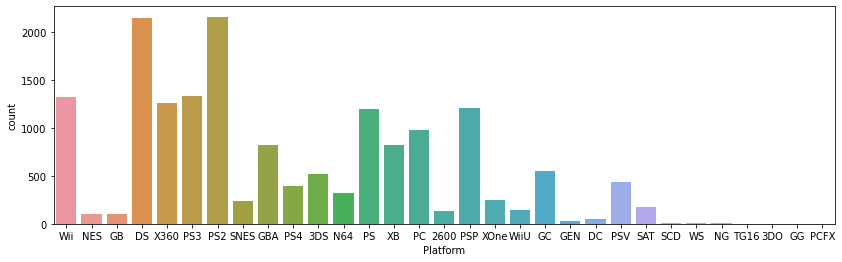

In [14]:
plt.figure(figsize=(14,4))
sns.countplot(Data.Platform)

In [15]:
Data.Platform.value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [16]:
Data.Year_of_Release.describe()

count    16450.000000
mean      2006.487356
std          5.878995
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year_of_Release, dtype: float64

In [17]:
Data.Year_of_Release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [18]:
Data.Year_of_Release.isnull().sum()

269

In [19]:
Data.Year_of_Release.mode()

0    2008.0
dtype: float64

In [20]:
Data.Year_of_Release.fillna("2008.0",inplace=True)

In [21]:
Data.Year_of_Release.isnull().sum()

0

In [22]:
Data.Year_of_Release.value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
2008.0     269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year_of_Release', ylabel='count'>

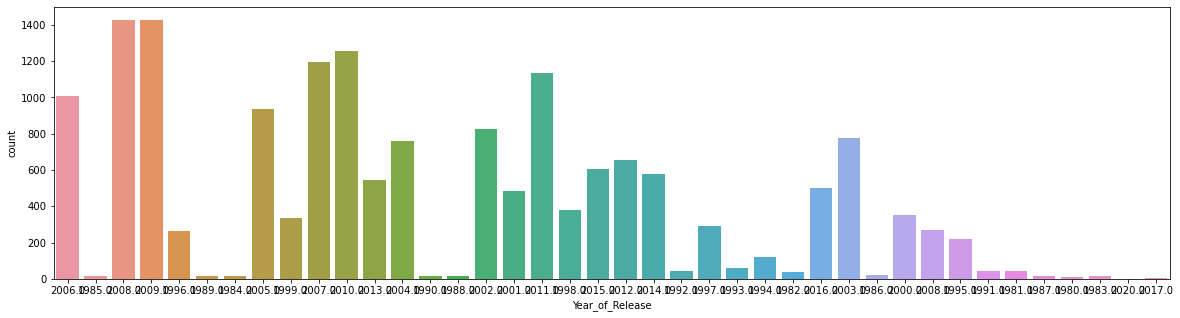

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(Data.Year_of_Release)

In [24]:
Data.Publisher.describe()

count               16665
unique                580
top       Electronic Arts
freq                 1356
Name: Publisher, dtype: object

In [25]:
Data.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',


In [26]:
Data.Publisher.isnull().sum()

54

In [27]:
l = dict(Data.Name[Data.Publisher.isnull()])

In [28]:
Data.Publisher[Data.Name==l[475]] = "THQ"
Data.Publisher[Data.Name==l[1301]] = "Electronic Arts"
Data.Publisher[Data.Name==l[1667]] = "Take-Two Interactive"
Data.Publisher[Data.Name==l[2212]] = "Sony Computer Entertainment"
Data.Publisher[Data.Name==l[3148]] = "Majesco Entertainment"
Data.Publisher[Data.Name==l[3159]] = "Majesco Entertainment"
Data.Publisher[Data.Name==l[3755]] = "Majesco Entertainment"
Data.Publisher[Data.Name==l[4127]] = "Sega"
Data.Publisher[Data.Name==l[4508]] = "THQ"
Data.Publisher[Data.Name==l[4615]] = "THQ"
Data.Publisher[Data.Name==l[5294]] = "Nintendo"
Data.Publisher[Data.Name==l[5633]] = "Majesco Entertainment"
Data.Publisher[Data.Name==l[6256]] = "Nintendo"
Data.Publisher[Data.Name==l[6415]] = "Majesco Entertainment"
Data.Publisher[Data.Name==l[6532]] = "Gotham Games"
Data.Publisher[Data.Name==l[6626]] = "Nintendo"
Data.Publisher[Data.Name==l[6831]] = "THQ"
Data.Publisher[Data.Name==l[7189]] = "Nintendo"
Data.Publisher[Data.Name==l[7333]] = "Atari"
Data.Publisher[Data.Name==l[7477]] = "Nintendo"
Data.Publisher[Data.Name==l[7930]] = "THQ"
Data.Publisher[Data.Name==l[8317]]="Nintendo"
Data.Publisher[Data.Name==l[8328]]="Global Star"
Data.Publisher[Data.Name==l[8358]]="Konami Digital Entertainment"
Data.Publisher[Data.Name==l[8494]]="Unknown"
Data.Publisher[Data.Name==l[8754]]="Majesco Entertainment"
Data.Publisher[Data.Name==l[8837]]="Nintendo"
Data.Publisher[Data.Name==l[8883]]="Nintendo"
Data.Publisher[Data.Name==l[9703]]="Majesco Entertainment"
Data.Publisher[Data.Name==l[9812]]="Konami Digital Entertainment"
Data.Publisher[Data.Name==l[10418]]="Habro Interactive"
Data.Publisher[Data.Name==l[11175]]="Microsoft Game Studios"
Data.Publisher[Data.Name==l[11569]]="Hudson soft"
Data.Publisher[Data.Name==l[11985]]="Unknown"
Data.Publisher[Data.Name==l[12209]]="Nintendo"
Data.Publisher[Data.Name==l[12544]]="Wargaming.net"
Data.Publisher[Data.Name==l[12629]]="Nintendo"
Data.Publisher[Data.Name==l[12881]]="Sony Computer Entertainment"
Data.Publisher[Data.Name==l[13197]] = "Nintendo"
Data.Publisher[Data.Name==l[13274]] = "Nintendo"
Data.Publisher[Data.Name==l[13299]] = "Nintendo"
Data.Publisher[Data.Name==l[13537]] = "Rejet"
Data.Publisher[Data.Name==l[13876]] = "Zoo Games"
Data.Publisher[Data.Name==l[14137]] = "Gearbox Software"
Data.Publisher[Data.Name==l[14153]] = "Unknown"
Data.Publisher[Data.Name==l[14163]] = "Majesco Entertainment"
Data.Publisher[Data.Name==l[14189]] = "Ubisoft"
Data.Publisher[Data.Name==l[14196]] = "Unknown"
Data.Publisher[Data.Name==l[14519]] = "Excalibur publishing"
Data.Publisher[Data.Name==l[14747]] = "Unknown"
Data.Publisher[Data.Name==l[14975]] = "Unknown"
Data.Publisher[Data.Name==l[15621]] = "Majesco Entertainment"
Data.Publisher[Data.Name==l[16600]] = "Nintendo"
Data.Publisher[Data.Name==l[16644]] = "Nintendo"

C:\Users\HP\AppData\Local\Temp/ipykernel_13544/1457524211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.Publisher[Data.Name==l[475]] = "THQ"
C:\Users\HP\AppData\Local\Temp/ipykernel_13544/1457524211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.Publisher[Data.Name==l[1301]] = "Electronic Arts"
C:\Users\HP\AppData\Local\Temp/ipykernel_13544/1457524211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data.Publish

In [29]:
Data.Publisher.value_counts()

Electronic Arts                 1357
Activision                       985
Namco Bandai Games               938
Ubisoft                          934
Konami Digital Entertainment     836
                                ... 
Navarre Corp                       1
Pow                                1
MediaQuest                         1
Team17 Software                    1
Yumedia                            1
Name: Publisher, Length: 584, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Publisher', ylabel='count'>

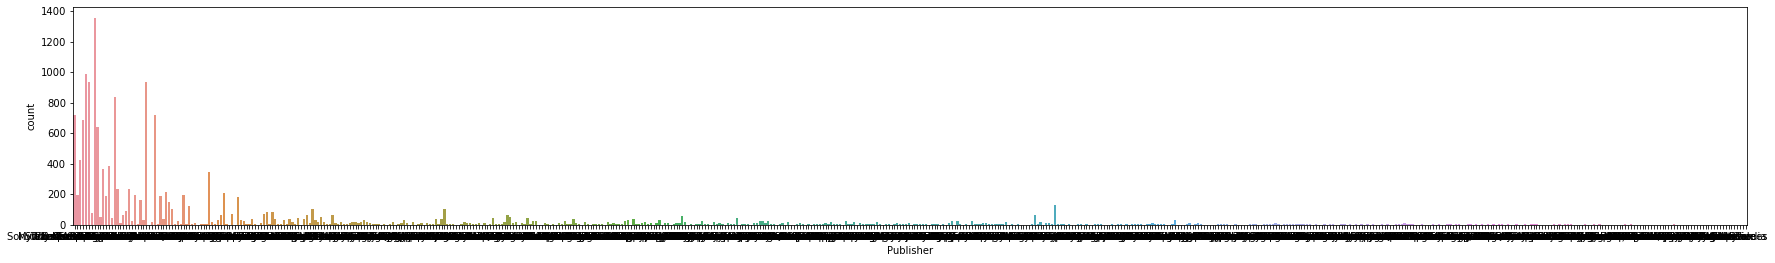

In [30]:
plt.figure(figsize=(30,4))
sns.countplot(Data.Publisher)

In [31]:
Data.Critic_Score.describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [32]:
Data.Critic_Score.isnull().sum()

8582

In [33]:
Data.Critic_Score.fillna(Data.Critic_Score.mean(),inplace=True)

In [34]:
Data.Critic_Score.isnull().sum()

0

In [35]:
Data.Critic_Score.value_counts()

68.967679    8582
70.000000     256
71.000000     254
75.000000     245
78.000000     240
             ... 
20.000000       3
17.000000       1
13.000000       1
21.000000       1
22.000000       1
Name: Critic_Score, Length: 83, dtype: int64

In [36]:
Data.Critic_Count.describe()

count    8137.000000
mean       26.360821
std        18.980495
min         3.000000
25%        12.000000
50%        21.000000
75%        36.000000
max       113.000000
Name: Critic_Count, dtype: float64

In [37]:
Data.Critic_Count.isnull().sum()

8582

In [38]:
Data.Critic_Count.fillna(Data.Critic_Score.mean(),inplace=True)

In [39]:
Data.Critic_Count.isnull().sum()

0

In [40]:
Data.Critic_Count.value_counts()

68.967679     8582
4.000000       307
5.000000       273
9.000000       248
11.000000      248
              ... 
113.000000       1
92.000000        1
105.000000       1
107.000000       1
104.000000       1
Name: Critic_Count, Length: 107, dtype: int64

In [41]:
Data.User_Score.describe()

count     10015
unique       96
top         tbd
freq       2425
Name: User_Score, dtype: object

In [42]:
Data.User_Score.isnull().sum()

6704

In [43]:
Data.User_Score.fillna(Data.User_Score.mode(),inplace=True)

In [44]:
Data.User_Score.isnull().sum()

6704

In [45]:
Data.User_Count.describe()

count     7590.000000
mean       162.229908
std        561.282326
min          4.000000
25%         10.000000
50%         24.000000
75%         81.000000
max      10665.000000
Name: User_Count, dtype: float64

In [46]:
Data.User_Count.isnull().sum()

9129

In [47]:
Data.User_Count.fillna(Data.User_Count.mean(),inplace=True)

In [48]:
Data.User_Count.isnull().sum()

0

In [49]:
Data.Developer.describe()

count       10096
unique       1696
top       Ubisoft
freq          204
Name: Developer, dtype: object

In [50]:
Data.Developer.isnull().sum()

6623

In [51]:
Data.Developer.mode()

0    Ubisoft
dtype: object

In [52]:
Data.Developer.fillna("0",inplace=True)

In [53]:
Data.Developer.isnull().sum()

0

In [54]:
Data.Developer.value_counts()

0                                6623
Ubisoft                           204
EA Sports                         172
EA Canada                         167
Konami                            162
                                 ... 
Mastertronic, V5 Play Studio        1
Hypnos Entertainment                1
Ambrella, The Pokemon Company       1
Metro3D                             1
Valhalla Game Studios               1
Name: Developer, Length: 1697, dtype: int64

In [55]:
Data.Rating.describe()

count     9950
unique       8
top          E
freq      3991
Name: Rating, dtype: object

In [56]:
Data.Rating.isnull().sum()

6769

In [57]:
Data.Rating.mode()

0    E
dtype: object

In [58]:
Data.Rating.fillna("0",inplace=True)

In [59]:
Data.Rating.isnull().sum()

0

In [60]:
Data=Data.drop(["Name","Genre"],axis=1)

In [61]:
Data.shape

(16719, 12)

<h2 style="color:green"> PERFORM DUMMY </h2>

In [62]:
dummy=pd.get_dummies(Data)

In [63]:
dummy.shape

(16719, 2463)

In [64]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Columns: 2463 entries, NA_Sales to Rating_T
dtypes: float64(6), uint8(2457)
memory usage: 39.9 MB


<h2 style="color:green"> PERFORM SCALER </h2>

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(dummy)
scaled_data=scaler.transform(dummy)

In [66]:
x1= pd.DataFrame(scaled_data)
x1.head()

,0,1,2,3,4,5,6,7,8,9,...,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462
0,1.000000,1.000000,0.368885,0.741176,0.436364,0.029828,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.703095,0.123619,0.666341,0.658443,0.599706,0.014842,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.379110,0.440608,0.370841,0.811765,0.636364,0.066129,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.377418,0.377417,0.320939,0.788235,0.636364,0.017634,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.272485,0.306975,1.000000,0.658443,0.599706,0.014842,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
x1.shape

(16719, 2463)

<h2 style="color:green"> SEPARATE TRAIN & TEST </h2>

In [68]:
x_tr=x1.iloc[:14576]
x_te=x1.iloc[14576:]

In [69]:
x_train,x_test,y_train,y_test= train_test_split(x_tr,y,train_size = 0.8, test_size = 0.2,random_state =50)

<h2 style="color:green"> PERFORM REGRESSION </h2>

In [70]:
model=LinearRegression().fit(x_train,y_train)
print("Train Score =",model.score(x_train,y_train))
print("Test Score =",model.score(x_test,y_test))

Train Score = 0.9941979904729864
Test Score = -1.8212855866777341e+18


In [71]:
predicts=model.predict(x_test)

In [72]:
mean_squared_error(y_test,predicts,squared=False)

1677748185.9590137

In [73]:
model1=DecisionTreeRegressor().fit(x_train,y_train)
print("Train Score =",model1.score(x_train,y_train))
print("Test Score =",model1.score(x_test,y_test))
predict_y=model1.predict(x_test)

Train Score = 0.9999999833596269
Test Score = 0.9446548026645574


In [74]:
predicts=model1.predict(x_test)

In [75]:
mean_squared_error(y_test,predicts,squared=False)

0.29246757402300205

In [76]:
model2=RandomForestRegressor(n_estimators = 100, random_state = 0)
model2.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [77]:
model2.score(x_train,y_train)

0.9825578736576563

In [78]:
model2.score(x_test,y_test)

0.979658949889938

In [79]:
predicts=model2.predict(x_test)

In [80]:
mean_squared_error(y_test,predicts,squared=False)

0.17730641035714756

<h2 style="color:green"> GRADIENTBOOSTING HAS THE BEST ACCURACY </h2>

In [81]:
model3=GradientBoostingRegressor(n_estimators = 100, random_state = 0)
model3.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [82]:
model3.score(x_train,y_train)

0.997726078213354

In [83]:
model3.score(x_test,y_test)

0.991515825352971

In [84]:
predicts=model3.predict(x_test)

In [85]:
mean_squared_error(y_test,predicts,squared=False)

0.1145097726799658

In [86]:
result=model3.predict(x_te)

In [87]:
print(result)

[0.15674411 0.14440739 0.15674411 ... 0.09916852 0.05094457 0.07235524]


In [88]:
regress=AdaBoostRegressor(random_state=0, n_estimators=100)
regress.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [89]:
regress.score(x_train,y_train)

0.2842434456816806

In [90]:
regress.score(x_test,y_test)

-0.4008142624501494

In [91]:
predicts=regress.predict(x_test)

In [92]:
mean_squared_error(y_test,predicts,squared=False)

1.4713907788817202

In [93]:
ans=pd.DataFrame(result)

In [104]:
actresult=pd.concat([bigTe.Name,ans],axis=1)
actresult.rename(columns={0:'Global sales'},inplace=True)

In [105]:
actresult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2143 non-null   object 
 1   Global sales  2143 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.6+ KB


<h2 style="color:green"> TO CONVERT CSV FILE </h2>

In [106]:
actresult.to_csv('Desktop/2022-Hackathon.csv',index=True)